In [1]:
!pip install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.5/573.5 kB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 924.6/924.6 kB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 90.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 39.2 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: ten

In [2]:
import numpy as np
import tensorflow as tf
import autokeras as ak

# 데이터 로딩
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 데이터 전처리: 스케일링
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# 데이터 전처리: 차원 확장 (AutoKeras에 맞게 4D로 만듦)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# AutoKeras 모델 생성
clf = ak.ImageClassifier(overwrite=True, max_trials=1)

# 모델 훈련
history = clf.fit(x_train, y_train, epochs=10)

# 모델 평가
print(clf.evaluate(x_test, y_test))

Trial 1 Complete [00h 02m 09s]
val_loss: 0.042504601180553436

Best val_loss So Far: 0.042504601180553436
Total elapsed time: 00h 02m 09s
Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1606 - accuracy: 0.9510
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0739 - accuracy: 0.9776
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0587 - accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0520 - accuracy: 0.9835
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0465 - accuracy: 0.9860
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0426 - accuracy: 0.9863
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0387 - accuracy: 0.9876
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0330 - accuracy: 0.9894
Epoch 9/10
1875/1875 [===================

In [3]:
import matplotlib.pyplot as plt

# 모델의 구성 출력
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 cast_to_float32 (CastToFlo  (None, 28, 28, 1)         0         
 at32)                                                           
                                                                 
 normalization (Normalizati  (None, 28, 28, 1)         3         
 on)                                                             
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0     

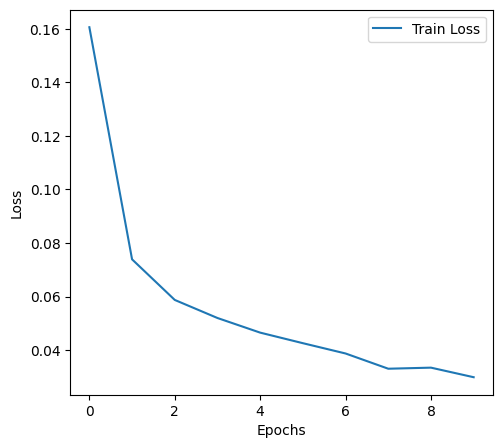

In [4]:
# 학습 과정 시각화
plt.figure(figsize=(12, 5))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

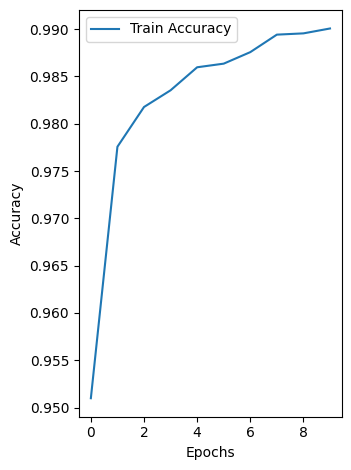

In [5]:
# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

---

AutoML

In [7]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 MB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.42.0.3-py2.py3-none-any.whl size=240945068 sha256=123531bd068135a37d42730ef4170c5241a0aef6b8e3b107b1487afcbe0e7458
  Stored in directory: /root/.cache/pip/wheels/f9/7d/1d/e1258f0558603969a8393cb5b22a18e313337f01627a118302
Successfully built h2o


In [8]:
import h2o
from h2o.automl import H2OAutoML

# H2O 초기화
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20" 2023-07-18; OpenJDK Runtime Environment (build 11.0.20+8-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20+8-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpqhjlpodf
  JVM stdout: /tmp/tmpqhjlpodf/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpqhjlpodf/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_unknownUser_9r1nsf
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [9]:
# 데이터 로드
data = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")

# 데이터 분할
train, test = data.split_frame([0.8])

# 응답 변수 및 입력 변수 설정
response = "response"
train[response] = train[response].asfactor()
test[response] = test[response].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [10]:
# AutoML 설정 및 실행
aml = H2OAutoML(max_runtime_secs=120, seed=1)
aml.train(y=response, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),12/12
# GBM base models (used / total),5/5
# XGBoost base models (used / total),3/3
# DRF base models (used / total),2/2
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [11]:
# 성능 평가
lb = aml.leaderboard
print(lb.head())

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_AllModels_2_AutoML_1_20230825_54325     0.78542    0.554185  0.805113                0.318225  0.433668  0.188068
StackedEnsemble_AllModels_1_AutoML_1_20230825_54325     0.785119   0.554457  0.804891                0.325073  0.433797  0.18818
StackedEnsemble_BestOfFamily_2_AutoML_1_20230825_54325  0.783548   0.556433  0.802314                0.343856  0.434599  0.188876
StackedEnsemble_BestOfFamily_1_AutoML_1_20230825_54325  0.783039   0.557245  0.801819                0.325709  0.434906  0.189143
StackedEnsemble_BestOfFamily_3_AutoML_1_20230825_54325  0.782883   0.557085  0.80125                 0.328954  0.434936  0.189169
GBM_1_AutoML_1_20230825_54325                           0.779881   0.560653  0.799879                0.33286   0.436443  0.190482
GBM_3_AutoML_1_20230825_54325                           0.771213   0.5695    0.791314      

In [12]:
# 최고 성능 모델 예측
preds = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [13]:
preds

predict,p0,p1
1,0.307795,0.692205
1,0.116796,0.883204
1,0.107707,0.892293
0,0.666506,0.333494
1,0.148411,0.851589
1,0.354999,0.645001
1,0.0799369,0.920063
1,0.238242,0.761758
0,0.912549,0.0874513
1,0.314808,0.685192
